<a href="https://colab.research.google.com/github/rafaelfabri/Data-Science/blob/master/Analisando_os_Dados_da_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Londres

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

###Introdução 



![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTY6n0zNhLqjeavK0OCF_TwI7bQiqXd1fIE2ujbwnGJK9tm_JVc)



Atualmente Londres é uma das cidades mais importantes do mundo, seu nascimento ocorreu durante as conquistas do império Romano por todo o continente Europeu. A cidade foi contituída no ano de 43 DC, e após todos estes anos passou por muitos fatos históricos. [(Ramos, 2019)](https://www.suapesquisa.com/cidadesdomundo/historia_londres.htm)

Nos dias atuais Londres se tornou uma das cidades mais caras para se viver, possuindo uma população de 12,1 milhões de habitantes  e apresentando muitos pontos turísticos lindos. Boa parte dos locais mais caros de Londres se concentraram nos bairros de Kensington & Chelsea, Belgravia e Hampstead. [(Redação, 2013)](https://www.idealista.pt/news/imobiliario/internacional/2013/07/23/14047-os-bairros-dos-milionarios-em-londres) [(Eurostat, 2019)](https://ec.europa.eu/eurostat/statistics-explained/index.php/Statistics_on_European_cities)

## Obtenção dos Dados


 Os dados coletados para a realização deste projeto foram coletados a partir do site da [Airbnb](http://insideairbnb.com/get-the-data.html).

 Os dados escolhidos foram referentes a capital da Inglaterra - Londres.

 O arquivo utilizado para a análise exploratória de dados foi:
 
 * `listings.csv` - *Summary information and metrics for listings in London (good for visualisations).*

 

 





**Abaixo será importado todas as bibliotecas que foram utilizadas neste projeto**




In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


**Abaixo será importado os dados utilizados neste projeto**

In [0]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2019-11-05/visualisations/listings.csv")

## Análise dos Dados


Com o intuito de uma maior facilidade para o entendimento deste trabalho, abaixo está a legenda referente a cada variável do arquivo. 

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome do estabelecimento/imóvel a ser alugado
* `host_id` - identificação do dono do imóvel
* `host_name` - nome do dono do imóvel
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - bairro onde se encontra o imóvel
* `latitude` - referência a latitude
* `longitude` - referência a longitude
* `room_type` - tipo de imóvel a ser alugado
* `price` - preço
* `minimum_nights` - quantidade de noite mínimas para se hospedar
* `number_of_reviews` - número de comentários que a propriedade possui
* `last_review` - último comentário
* `reviews_per_month` - quantidade de comentários por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` -  número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

**Logo será mostrado as 5 primeiras entradas do arquivo csv utilizado.**

In [0]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.58,2,336
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.17,2,365
2,90700,Sunny Notting Hill flat & terrace,491286,Chil,NaN,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.33,2,268
3,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,30,88,2019-09-23,0.73,1,158
4,92399,"MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...",497366,Andrea & Mark,NaN,Islington,51.55071,-0.08547,Private room,77,1,207,2019-10-21,2.04,2,336


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [0]:
# identificar o volume de dados do DataFrame
print("\t Informações referentes ao conjunto de dados\n")
print("Entradas \t", df.shape[0]) # = print("variaveis \t" + str(df.shape[0]))
print("Variáveis \t", df.shape[1])
print("\n \t Tipo de variáveis em cada entrada\n ")

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

	 Informações referentes ao conjunto de dados

Entradas 	 85068
Variáveis 	 16

 	 Tipo de variáveis em cada entrada
 


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Foram encontrados 16 inputs (entradas) diferentes, o nome de cada uma e seu tipo é mostrado na tabela acima. Essas 16 entradas apresentam 85068 variáveis (informações/dados) fornecidas pela Airbnb.

* int- variáveis do tipo inteiro
* float - variávies do tipo flutuante(decimais)
* object - variávies do tipo objeto

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Saber o percentual de dados não existentes em cada entrada é importante, pois, pode-se ter uma ideia da qualidade desses conjuntos de dados **(dataset)**, com intuito de saber quais dessas entradas podem ser usadas ou quais podem prejudicar a análise.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.235177
last_review                       0.235177
name                              0.000294
host_name                         0.000141
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Nota-se através da análise:

* neighbourhood_group não possui nenhum dado;
* reviews_per_month possui 23.52% de seus dados incompletos;
* last_review possui 23.52% de seus dados incompletos;

Os outros possuem percentuais menores que 0.01% de dados incompletos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Descobrir a distribuição dos dados é muito importante, pois, assim pode-se realizar uma análise correta destes dados.

Como a variável neighbourhood_group não possui nenhuma entrada, esta variável será excluída

In [0]:
df_clean=df.copy()
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

**obs: Foi refeito abaixo nova quantidade de Entradas e Variáveis** 

In [0]:
print("\t Informações referentes ao conjunto de dados\n")
print("Entradas \t", df_clean.shape[0]) 
print("Variáveis \t", df_clean.shape[1])

	 Informações referentes ao conjunto de dados

Entradas 	 85068
Variáveis 	 15


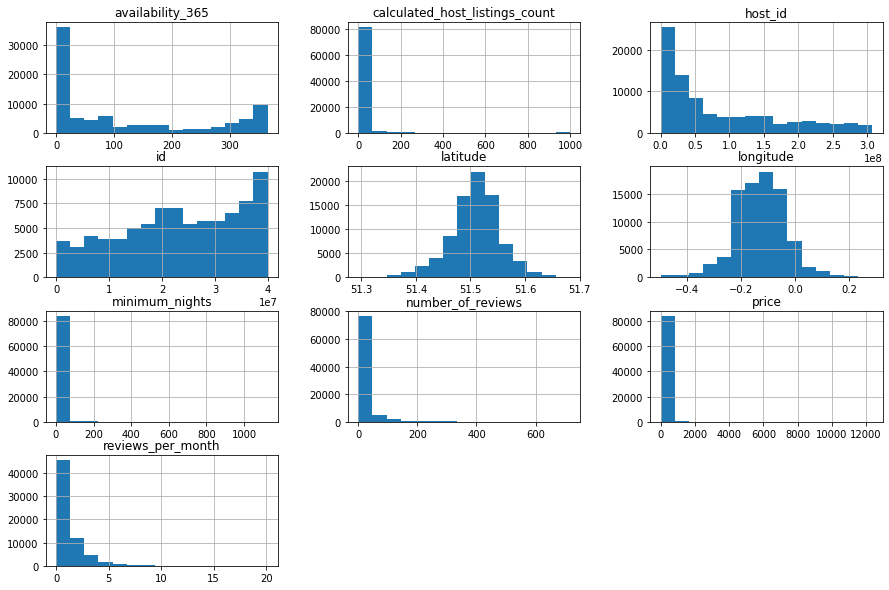

In [0]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


Pode-se observar que alguns gráficos tem valores muito altos, assim se tornando discrepantes.

Um exemplo pode ser observado no gráfico de preço, nota-se que a maior parte dos valores encontra-se entre 0 e 1000, porém existe alguns poucos pontos até 12000, estes valores serão analisados adiante como possíveis Outliers (pontos discrepantes). 

### **Q4. Qual a média dos preços de aluguel e possíveis outliers?**

Abaixo encontra-se o código que ira mostrar a média referente a entrada de aluguel. 

In [0]:
# ver a média da coluna `price``
df_clean[['price']].mean()
df[['price']].mean()

price    122.336766
dtype: float64

**Outliers - dados atípicos**

Outliers são dados discrepantes em relação ao conjunto de dados coletados, estes atrapalham a análise e distorcem resultados.

Para um melhor entendimento, imagine que uma pessoa está se pesando, e para um resultado preciso, esta se pesa 10 vezes, com o objetivo de coletar uma média de seu peso. Em nove pesagens, os resultados da balança foram de aproximadamente 60 kg, porém na décima pesagem o resultado foi 80 kg, alguma coisa está errada, não concorda?

Logo, muito provavelmente ocorreu algum problema com a balança ou um problema externo relacionado ao ambiente, mas se este dado for incluído na avaliação da média da massa corporal da pessoa, o valor obtido estará um pouco discrepante, mostrando um resultado menos realista.

**Exemplo de Outliers em gráficos lineares**

![alt text](https://opentextbc.ca/introstatopenstax/wp-content/uploads/sites/277/2019/07/CNX_Stats_C012_M09_item001-1.jpg) 

A imagem acima mostra uma reta na qual passa pela maioria dos pontos, porém um destes está distante da reta, logo este ponto fora da reta que está fugindo do padrão indica que este dado é um Outlier.

Abaixo será realizado o código e mostrado os dados referentes aos preços de aluguéis de Londres, para que seja verificado se existe um possível dado discrepante.

In [0]:
df_clean[['price']].describe()

,price
count,85068.000000
mean,122.336766
std,220.749123
min,0.000000
25%,47.000000
50%,84.000000
75%,140.000000
max,12345.000000


**Observações**

* Nota-se que o média é igual a 122.33, porém o desvio padrão é de 220.74, isto é estranho, pois o desvio padrão é mais alto que a própria média, indicando alta variabilidade/dispersão dos dados.

* É possível observar também que o maior preço é igual a 12345.00, sendo este muito maior que a própria média e mediana, logo, pode-se afirmar que alguns dados estão deslocando a média para um valor maior, indicando a existencia de Outliers.

**Visão geral de todos os dados**

Abaixo situa-se as informações referentes a todos as entradas que são variáveis e não códigos como id.

In [0]:
df_clean[['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,85068.000000,85068.000000,85068.000000,85068.000000,85068.000000,65062.000000,85068.000000,85068.000000
mean,122.336766,51.509798,-0.128343,4.148105,17.471152,1.201995,22.151150,118.471987
std,220.749123,0.046341,0.093034,16.681720,36.789578,1.402728,110.654631,134.840097
min,0.000000,51.294790,-0.496680,1.000000,0.000000,0.010000,1.000000,0.000000
25%,47.000000,51.485610,-0.188413,1.000000,1.000000,0.250000,1.000000,0.000000
50%,84.000000,51.514015,-0.125725,2.000000,4.000000,0.730000,1.000000,58.000000
75%,140.000000,51.537580,-0.070127,3.000000,17.000000,1.630000,5.000000,244.000000
max,12345.000000,51.681690,0.285390,1125.000000,716.000000,20.130000,999.000000,365.000000


Se aplicado a mesma lógica em relação avaliação anterior, observa-se que:
* price
* minimum_nights
* number_of_reviews
* reviews_per_month
* calculated_host_listings_count
* availability_365

todas essas entradas apresentam valores discrepantes em relação a suas médias.

**Gráficos boxplot**

Neste momento será realizada análises através de um gráfico boxplot.

A partir de um gráfico boxplot é possível verificar a mediana, e onde provavelmente estará em relação aos limites, também é possível ver os quartis e alguns limites. Pontos fora destes limites podem ser considerados como dados discrepantes.

![alt text](http://www.leg.ufpr.br/~silvia/CE701/img445.png)

Foi realizado dois gráficos boxplot, com o intuito de verificar através de uma análise gráfica a distância de alguns valores em relação a média.

O primeiro conjunto de dados análisados foi a entrada preço.

**Entrada price**


 valores acima de 2000
 entradas  88
percentual 0.10344665444115297 %


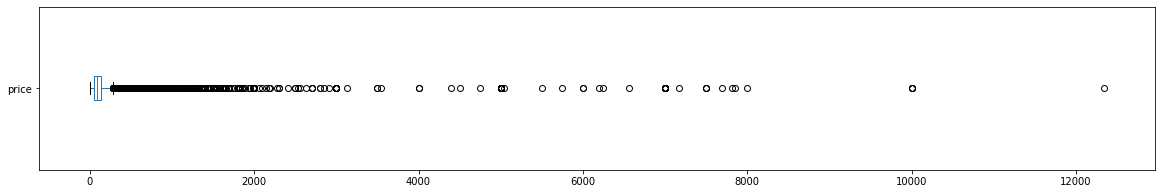

In [0]:
df_clean.price.plot(kind='box', vert=False,figsize=(20,3))
print("\n valores acima de 2000")
print(" entradas ", len(df[df.price>2000]) )
print("percentual", ((len(df[df.price>2000])/df.shape[0])*100),'%')


Observando este gráfico foi possível afirmar que existem muitos pontos fora da caixa do gráfico boxplot e dos limites dos dados. Foi escolhido retirar todos os dados acima de um preço 2000 euros, estes que são 0.103% de todos os dados.

Segunda entrada de dados análisada foi a entrada relacionada a quantidade mínima de noites que um hóspede poderia dormir.


**Entrada minimum_nights**


 valores acima de 180
entradas 12842
percentual 15.09615836742371 %


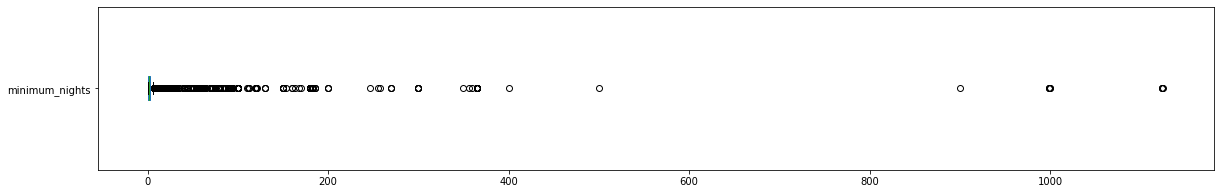

In [0]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(20,3) )
print("\n valores acima de 180")
print("entradas", len(df_clean[df_clean.price>180]))
print("percentual", (len(df_clean[df_clean.price>180])/df_clean.shape[0])*100,'%')

Nota-se através destes dados que ocorreu a mesma situação que a anterior. Desta vez foram retirados os dados a partir do valor de 180 que corresponde a 15.00%.

Abaixo está o código relacionado a remoção dos dados das duas entradas. Foi feito isto, pois estes dados estão deslocando a média e assim poderá prejudicar alguma análise.

In [0]:
df_clean.drop(df_clean[df_clean.price>2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>180].index, axis=0, inplace=True)




**obs: Foi refeito abaixo nova quantidade de Entradas e Variáveis** 

In [0]:
print("\t Informações referentes ao conjunto de dados\n")
print("Entradas \t", df_clean.shape[0]) 
print("Variáveis \t", df_clean.shape[1])

	 Informações referentes ao conjunto de dados

Entradas 	 84925
Variáveis 	 15


Nas entradas pode-se perceber que realmente houve uma dimunuição dos dados pela retirada dos pontos:
* Da variável price > 2000
* Da variável minimum_nights > 180

### **Q5 Refazendo o gráfico de histogramas?**

Agora com a remoção dos dados foi refeito abaixo os gráficos de histogramas.

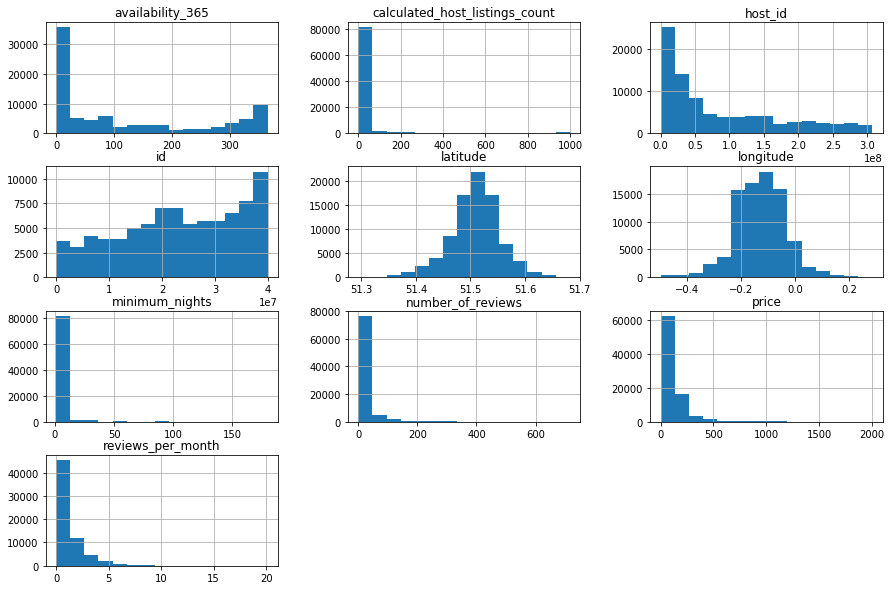

In [0]:
df_clean.hist(bins=15, figsize=(15,10));


### **Q6. Qual a correlação existente entre as variáveis?**

Chegou o momento de verificar as correlações existentes entre as entradas fornecidas.

Uma correlação indica uma dependência entre duas variáveis.

Tipos:
* correlação positiva: quando as variáveis aumentam, a outra também aumenta.

![alt text](https://www.researchgate.net/profile/Pablo_Guilherme/publication/260201209/figure/download/fig2/AS:654786894503937@1533124769556/FIGURA-3-DIAGRAMA-DE-DISPERSAO-CORRELACAO-POSITIVA.png
)
* correlação negativa: quando as variáveis aumentam, e a outra diminui.

    ![alt text](http://www.8idea.com.br/wp-content/uploads/2017/05/2-1.jpg)



* correlação nula: não existe um tipo de tendência, logo não existe 
dependências.

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwLM8ZZinL5NXAY1ULmJS2SuYfEJKxWeFQWp7n6mQc9cjs22KISA&s)


Abaixo foi está o código para verificar a correlação e tabela de correlação.

Foram analisados apenas entradas varáveis e determinantes para a correção, entradas como identificação e nome não foi realizada, pois são não dados informativos e complementares.

In [0]:
# criar uma matriz de correlação
correlacao=df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(correlacao)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.029513,-0.101821,-0.065233,0.193566,0.128434
minimum_nights,0.029513,1.000000,-0.044861,-0.093426,-0.022366,0.050483
number_of_reviews,-0.101821,-0.044861,1.000000,0.557344,-0.058436,0.123068
reviews_per_month,-0.065233,-0.093426,0.557344,1.000000,-0.054381,0.134804
calculated_host_listings_count,0.193566,-0.022366,-0.058436,-0.054381,1.000000,-0.048273
availability_365,0.128434,0.050483,0.123068,0.134804,-0.048273,1.000000


Na diagonal principal observa-se que todos os resultados são 1, porém essa parte é a comparação de uma entrada com a mesma.

Pela tabela de correlação observa-se que não existe nenhuma correlação negativa ou positiva muito alta. A maior correlação foi de 0,557344 (reviews_per_month x number_of_reviews). Porém está correlação não indica nada, pois já é esperado que quando os reviews por mẽs forem altos, o número de rewiews totais aumentem.

Um heatmap, mostra as correlações de acordo com a intensidade de cada cor.

* Quanto mais azul maior é a correlação positiva.
* Quanto mais vermelho maior é a correlação negativa.

Este gráfico é uma forma simples e intuitiva de se observar correlações.


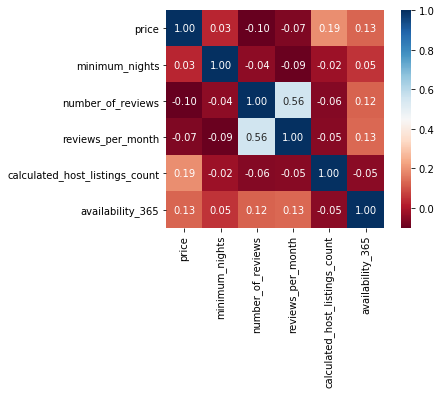

In [0]:
# plotar um heatmap a partir das correlações
sb.heatmap(correlacao,  cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)


### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

Obs:
* Entire home/apt - Casa / apto inteiro
* Private room  - Sala privada
* Hotel room  - quarto de hotel
* Shared room - Quarto compartilhado



In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()



Entire home/apt    47342
Private room       35846
Hotel room          1109
Shared room          628
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df.shape[0]


Entire home/apt    0.556519
Private room       0.421381
Hotel room         0.013037
Shared room        0.007382
Name: room_type, dtype: float64

O imóvel mais alugado são casas ou apartamentos inteiros, quartos privados ficam em segundo, em terceiro quarto de hotel, e por último quarto compartilhado.

Isso indica que as pessoas que viajam para Londres preferem imóveis com maior privacidade, banheiro, quarto, e uma cozinha. Uma hipótese é que provavelmente a maioria dessas pessoas devem viajar a Londres acompanhadas com a família ou amigos, e não para um único dia, para algum compromisso na cidade, pois se uma pessoa iria ficar apenas um dia, um único quarto seria muito mais fácil. 

### **Q8. Qual a localidade mais cara do dataset?**



Abaixo está as localidades onde mais se alugou imóveis em Londres

In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)


neighbourhood
Kensington and Chelsea    210.179060
Westminster               192.312507
City of London            184.688985
Camden                    138.950361
Hammersmith and Fulham    129.605470
Richmond upon Thames      123.613200
Wandsworth                114.435333
Islington                 112.626077
Southwark                 107.049090
Merton                    103.421402
Hounslow                   95.868677
Lambeth                    92.871240
Hackney                    91.873325
Tower Hamlets              90.974150
Brent                      90.189675
Harrow                     87.138776
Greenwich                  86.633394
Newham                     82.909137
Barnet                     81.068924
Ealing                     79.509174
Haringey                   79.127339
Kingston upon Thames       78.178378
Havering                   73.572549
Sutton                     69.259016
Waltham Forest             68.832984
Lewisham                   67.933711
Enfield                 

Os três bairros mais caros foram:
* 1) Kensington and Chelsea
* 2) Westminster
* 3) City of London    

Nota-se através dos resultados da tabela, que geralmente locais onde possuem pontos turísticos importantes acabam possuindo um preço mais alto de aluguel, claro está apenas uma hipótese, pois há muitos pontos turísticos em Londres. Os bairros que aparecerem como as mais caros são Kensington and Chelsea, Westminster e City of London possuem muitos pontos turísiticos.

**Kensington and Chelsea**

Kensington and Chelsea é o bairro mais caro para se possuir propriedades em Londres, além disso existem muitas mansões e pessoas famosas que moram nesta região, isto já é um bom fator para atrair turístas[(Redação, 2013)](https://www.idealista.pt/news/imobiliario/internacional/2013/07/23/14047-os-bairros-dos-milionarios-em-londres), [tudo sobre londres](https://www.tudosobrelondres.com/distritos).


Contudo Kensington and Chelsea possui outros pontos muito interessante lá está Hyde Park e o Kensington Gardens, parques muito interessantes, e que possuem jardins e lagos. Há também dois museus nesta região, como o museu de história natural, e o museus Albert e Victoria, porém estas regiões não são tão animadas a noite, sendo mais calmas [(Redação, 2013)](https://www.idealista.pt/news/imobiliario/internacional/2013/07/23/14047-os-bairros-dos-milionarios-em-londres), [tudo sobre londres](https://www.tudosobrelondres.com/distritos).

Devido a esses fatores citados acima, provalemente estes influenciam na média do preço dos imóveis para alugel, pois possuem pontos turísticos importantes, e além disso esse bairro possui propriedades caras sendo de um alto nível aquisitivo, logo também tornando mais caro os imóveis de alugéis na região.


**Westminster**

Bem Westminster também é um bairro muito interessante de Londres. Aqui encontra-se as resisdências da família real da Inglaterra, também em Westminster está o famoso relógio Big Ben e a sede do parlamento británico palácio de Westminster. Também existem vários outros pontos turísticos nesta região ou próximos desta [(tudo sobre londres)](https://www.tudosobrelondres.com/distritos).

Novamente pode-se observar que existe um preço maior para os imóveis nesta região devido ao seus pontos turísticos.




Abaixo está a quantidade de entradas de cada bairro.

In [0]:
print(df_clean[df_clean.neighbourhood == "Kensington and Chelsea"].shape[0])
print(df_clean[df_clean.neighbourhood == "Westminster"].shape[0])

5998
9539


Bem esses valores mostram que existe para o bairro de Kensington and Chelsea 6018 imóveis para alugat, e para Westminster 9588.
Este resultado mostra para os dois mais caros bairros de Londres apresentam uma quantidade de dados representativas para análise uma correta.

In [0]:
print(df_clean.price[df_clean.neighbourhood == "Kensington and Chelsea"].describe())

count    5998.000000
mean      210.179060
std       215.674964
min         8.000000
25%        99.000000
50%       150.000000
75%       235.000000
max      2000.000000
Name: price, dtype: float64


In [0]:
print(df_clean.price[df_clean.neighbourhood == "Westminster"].describe())

count    9539.000000
mean      192.312507
std       182.313723
min         0.000000
25%        90.000000
50%       139.000000
75%       225.000000
max      2000.000000
Name: price, dtype: float64


Bem através da descrição estatística dos dois bairros, pode-se notar que existe alguns pontos a ser discutido. Observa-se que são bem semelhantes os dois resultados, logo abaixo foi discutido apenas os dados referentes a Westminster, porém esta análise também é valida para os dados de Kensington and Chelsea.

média = 216.208385

desvio = 433.248937

mínimo = 0.000000 

mediana = 140.000000

máximo = 10000.000000

Se observado a média e o desvio padrão, percebe-se que o desvio padrão é maior do que a média, e também existe uma grande diferença entre a média e a mediana.

Com esses três dados, é possível afirmar que existe alta variabilidade dos preços no bairro de Westminster, porém, pode ser que realmente exista uma alta variabilidade, claro este resultado acabou dando uma alta diferença, o que não é normal, mas se verificado melhor, um bairro grande e com muitas residências pode apresentar preços bem variados, exemplo um quarto compartilhado terá um preço bem abaixo do que um hotel 5 estrelas, e é possível que exista essas diferenças no bairro de Westminter.

Se comparado o preço mínimo com o máximo, nota-se que existe uma alta diferença mostrando o quanto grande é esta amplitude de preços, porém um preço mínimo de 0 euros, isso é meio estranho, pois dificilmente alguém alugará um quarto de graça, mas mesmo com isso existe uma grande amplitude.

Retirando o preços abaixo de 10, pois estes valores são muitos baixos, e são possíveis Outliers.

In [0]:
df_clean.drop(df_clean[df_clean.price<10].index, axis=0, inplace=True )

In [0]:
print(df_clean.price[df.neighbourhood == "Westminster"].describe())

count    9537.000000
mean      192.352836
std       182.311564
min        10.000000
25%        90.000000
50%       139.000000
75%       225.000000
max      2000.000000
Name: price, dtype: float64


Com a retirada dos dados menores do que 10, mesmo assim estes não afetaram siginificavamente a análise, mostrando que realmente tem uma grande amplitude entre a população estudada.

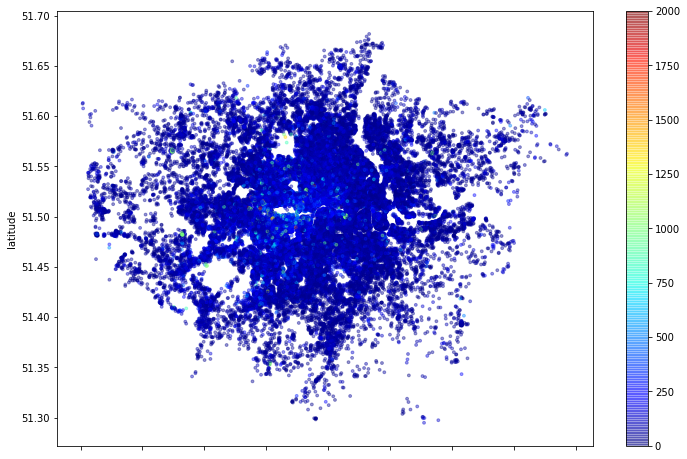

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));




### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
df_clean[['minimum_nights']].mean()

minimum_nights    3.852387
dtype: float64

Nota-se que normalmente as pessoas que vão para Londres ficam aproximadamente 4 dias, provalvente estas vão a passeio.

Este resultado se comparado junto ao tipo de imóvel mais alugado, nota-se que existe alguma semelhança, pois se uma pessoa vai para Londres ficar 4 dias e provavelmente vá a passeio, com certeza ira preferir um apartamento ou casa inteira, e este foi o estilo de imóvel mais alugado. 

## Conclusões


Foi realizada uma análise básica e superficial sobre os dados da Airbnb dos imóveis da cidade de Londres.

Porém pode-se perceber que existe Outliers que podem prejudicar a análise, também notou-se que os dois bairros mais caros da cidade apresentam realmente um padrão de vida mais alto, o que já se esperava, porém notou-se alta variabilidade nestes dados, o que futuramente pode ser melhorado e análisado com maior rigor.

Por fim esse conjunto de dados, é um data set resumido, e tem como objetivo apenas uma avaliação básica de alguns dados. Para uma análise completa recomenda-se utilizar o conjunto de dados completos, que apresenta 106 váriaveis.